In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Reading the data from the excel file

In [250]:
df=pd.read_excel('F:/Data/Participants_Data/Data_Train.xlsx')

In [251]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


book price data column names 

In [252]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

Dtype of each column value

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


# Data cleaning: Extract all the unique values

In [254]:
for col_names in df.columns:
    print(df[col_names][0])
    print(" ")

The Prisoner's Gold (The Hunters 3)
 
Chris Kuzneski
 
Paperback,– 10 Mar 2016
 
4.0 out of 5 stars
 
8 customer reviews
 
THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling author Chris Kuzneski, whose writing James Patterson says has 'raw power'. The team are hunting Marco Polo's hidden treasure, but who is on their tail?
THE HUNTERS
If you seek, they will find...

The travels of Marco Polo are known throughout the world.
But what if his story isn't complete?
What if his greatest adventure has yet to be discovered?
Guided by a journal believed to have been dictated by Polo himself,
the Hunters set out in search of his final legacy:
the mythical treasure gathered during Polo's lifetime of exploration.
But as every ancient clue brings them closer to the truth,
each new step puts them in increasing danger...
Explosive action. Killer characters. Classic Kuzneski.
 
Action & Adventure (Books)
 
Action & Adventure
 
220.0
 


Number of unique values per column

In [255]:
print("Number of unique values in each column")
for col_names in df.columns:
    print(col_names," ",df[col_names].nunique())

Number of unique values in each column
Title   5568
Author   3679
Edition   3370
Reviews   36
Ratings   342
Synopsis   5549
Genre   345
BookCategory   11
Price   1614


# Data cleaning : Checking for NULL values

In [256]:
print(df.isna().any())
print("No column has null values")

Title           False
Author          False
Edition         False
Reviews         False
Ratings         False
Synopsis        False
Genre           False
BookCategory    False
Price           False
dtype: bool
No column has null values


# Data cleaning : changing dtype of columns

In [257]:
print("Data types of columns")
df.dtypes

Data types of columns


Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [258]:
df['BookCategory']=df['BookCategory'].astype('category')
df.dtypes

Title             object
Author            object
Edition           object
Reviews           object
Ratings           object
Synopsis          object
Genre             object
BookCategory    category
Price            float64
dtype: object

In [259]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


We need to convert reviews and ratings to float type

In [260]:
objectlist=['Reviews','Ratings']
for obj in objectlist:
    df[obj]=df[obj].astype('string')
df.dtypes

Title             object
Author            object
Edition           object
Reviews           string
Ratings           string
Synopsis          object
Genre             object
BookCategory    category
Price            float64
dtype: object

# Extraxting Reviews  and Ratings from textual infomation using regular expression 

In [261]:
df.Reviews.str.extract('(\d+)').head()
#But some books may be rated out of 10

,0
0,4
1,3
2,4
3,4
4,5


In [262]:
reviewlist=[]
for review in df['Reviews']:
    value1=float(review[:3])
    value2=float(review[11:12])
    reviewlist.append(value1/value2)
     
print(reviewlist[:5])

[0.8, 0.78, 0.96, 0.82, 1.0]


In [263]:
reviewlist=np.array(reviewlist)
df.drop(['Reviews'],axis=1).head()

,Title,Author,Edition,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [264]:
df['Reviews']=reviewlist
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",0.80,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",0.78,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",0.96,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",0.82,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1.00,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [265]:
df['Ratings']=df.Ratings.str.extract('(\d+)')
df['Ratings']=pd.to_numeric(df['Ratings'])

In [266]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [267]:
df.dtypes

Title             object
Author            object
Edition           object
Reviews          float64
Ratings            int64
Synopsis          object
Genre             object
BookCategory    category
Price            float64
dtype: object

# Data cleaning : Edition has two values type of book cover and date fo manufacture we need to create two columns for bookcover and Date

In [268]:
df['Edition']=df['Edition'].astype('string')

In [269]:
bookcover=[]
publishdate=[]
for coverval in df['Edition']:
    coverval=coverval.split(',')
    if(len(coverval)>2):
        coverval[0]=coverval[0]+" "+coverval[1]
    if(len(coverval)>3):
        coverval[0]=coverval[0]+" "+coverval[2]
        
    bookcover.append(coverval[0])
    publishdate.append(coverval[len(coverval)-1])
    
    

In [270]:
print(bookcover[:5])
print(publishdate[:5])

['Paperback', 'Paperback', 'Paperback', 'Paperback', 'Hardcover']
['– 10 Mar 2016', '– 7 Nov 2012', '– 25 Feb 1982', '– 5 Oct 2017', '– 10 Oct 2006']


In [271]:
publishday=[]
publishmonth=[]
publishyear=[]

currentbook=0
for pbdate in publishdate:
    pbdate=pbdate.split()
    currentbook+=1
    for pbval in pbdate:
        if(pbval=='–'):
            continue
        elif(len(pbval)<=2):
            publishday.append(pbval)
        elif(len(pbval)==3):
            publishmonth.append(pbval)
        elif(len(pbval)==4):
            publishyear.append(pbval)
    if(len(publishday)<currentbook):
        publishday.append(np.nan)
    if(len(publishmonth)<currentbook):
        publishmonth.append(np.nan)
    if(len(publishyear)<currentbook):
        publishyear.append(np.nan)
        
        


In [272]:
print(publishday[:5])
print(publishmonth[:5])
print(publishyear[:5])

['10', '7', '25', '5', '10']
['Mar', 'Nov', 'Feb', 'Oct', 'Oct']
['2016', '2012', '1982', '2017', '2006']


In [273]:
df=df.drop(['Edition'],axis=1)
df.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [274]:
df['bookcover']=bookcover
df['publishday']=publishday
df['publishmonth']=publishmonth
df['publishyear']=publishyear
df['publishday']=pd.to_numeric(df['publishday'])

In [275]:
df.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,bookcover,publishday,publishmonth,publishyear
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10.0,Mar,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7.0,Nov,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25.0,Feb,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5.0,Oct,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10.0,Oct,2006


# Data cleaning : Checking for NULL values

In [276]:
df.isna().any()

Title           False
Author          False
Reviews         False
Ratings         False
Synopsis        False
Genre           False
BookCategory    False
Price           False
bookcover       False
publishday       True
publishmonth     True
publishyear      True
dtype: bool

# Data Preprocessing : Handling missing values

In [277]:
print("Number of unique values in each column")
for col_names in df.columns:
    print(col_names," ",df[col_names].nunique())

Number of unique values in each column
Title   5568
Author   3679
Reviews   36
Ratings   323
Synopsis   5549
Genre   345
BookCategory   11
Price   1614
bookcover   57
publishday   31
publishmonth   14
publishyear   57


Removing garbage data from publish month and publish year

In [279]:
for i in range(len(df)):
    if(df['publishmonth'][i]=='Box' or df['publishmonth'][i]=='set'):
        df['publishmonth'][i]=np.nan
    if(df['publishyear'][i]=='NTSC'):
        df['publishyear'][i]=np.nan

    

In [280]:
print("Number of unique values in each column")
for col_names in df.columns:
    print(col_names," ",df[col_names].nunique())

Number of unique values in each column
Title   5568
Author   3679
Reviews   36
Ratings   323
Synopsis   5549
Genre   345
BookCategory   11
Price   1614
bookcover   57
publishday   31
publishmonth   12
publishyear   56


In [281]:
df.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,bookcover,publishday,publishmonth,publishyear
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10.0,Mar,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7.0,Nov,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25.0,Feb,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5.0,Oct,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10.0,Oct,2006


In [282]:
print(df['publishday'].mean())
print(df['publishday'].median())

13.965773552290406
14.0


In [283]:
print(df['publishmonth'].mode())

0    Oct
dtype: object


In [284]:
print(df['publishyear'].mode())

0    2018
dtype: object


 Most number of books where bought in oct and 2018

# Dropping all rows with NA values 

In [285]:
df1=df.dropna()

In [286]:
print("Number of rows dropped " , len(df)-len(df1))

Number of rows dropped  456


Filling missing NA values with mean ,mode and median

Month is a categorical variable - Fill NA values with mode

Year is a categorical variable - Fill NA values with mode

Day is a contnous/categorical variable - Fill NA values with mean

In [287]:
df2=df

# Use mean ,median and mode to fill the missing values

In [288]:
df2['publishday']=df2['publishday'].replace(to_replace=np.nan,value=df['publishday'].mean())
df2['publishmonth']=df2['publishmonth'].replace(to_replace=np.nan,value=df['publishmonth'].mode()[0])
df2['publishyear']=df2['publishyear'].replace(to_replace=np.nan,value=df['publishyear'].mode()[0])

In [289]:
df2.isna().any()

Title           False
Author          False
Reviews         False
Ratings         False
Synopsis        False
Genre           False
BookCategory    False
Price           False
bookcover       False
publishday      False
publishmonth    False
publishyear     False
dtype: bool

# Using foward fill and backwardfill to fill null values

In [290]:
df3=df2
df3['publishday']=df3['publishday'].interpolate(method='linear',direction='forward')
df3['publishmonth']=df3['publishmonth'].interpolate(method='linear',direction='forward')
df3['publishyear']=df3['publishyear'].interpolate(method='linear',direction='forward')

In [291]:
df3.isna().any()

Title           False
Author          False
Reviews         False
Ratings         False
Synopsis        False
Genre           False
BookCategory    False
Price           False
bookcover       False
publishday      False
publishmonth    False
publishyear     False
dtype: bool

# One hot encoding

#Features used for one hot encoding- Author, genre ,bookcategory, bookcover,publishmonth

In [292]:
df['Author']=df['Author'].astype('category')
df['Genre']=df['Genre'].astype('category')
df['BookCategory']=df['BookCategory'].astype('category')
df['bookcover']=df['bookcover'].astype('category')
df['publishmonth']=df['publishmonth'].astype('category')

In [293]:
df.dtypes

Title             object
Author          category
Reviews          float64
Ratings            int64
Synopsis          object
Genre           category
BookCategory    category
Price            float64
bookcover       category
publishday       float64
publishmonth    category
publishyear       object
dtype: object

In [294]:
def dummy_encoding(df,categoricallist):
    for categoricalvar in categoricallist:
        enc=pd.get_dummies(df[categoricalvar],drop_first=True)
        df=pd.concat([df,enc],axis=1)
        df=df.drop([categoricalvar],axis=1)
    return df    

In [295]:
dummydf=dummy_encoding(df,['Genre','BookCategory','bookcover','publishmonth'])

In [296]:
len(dummydf.columns)

429

In [297]:
"""
print("Number of unique values in each column")
for col_names in dummydf.columns:
    print(col_names," ",dummydf[col_names].nunique())
"""

'\nprint("Number of unique values in each column")\nfor col_names in dummydf.columns:\n    print(col_names," ",dummydf[col_names].nunique())\n'

In [298]:
df11=dummy_encoding(df1,['Genre','BookCategory','bookcover','publishmonth'])
df22=dummy_encoding(df2,['Genre','BookCategory','bookcover','publishmonth'])
df33=dummy_encoding(df3,['Genre','BookCategory','bookcover','publishmonth'])

In [299]:
print(len(df11.columns))
print(len(df22.columns))
print(len(df33.columns))

411
429
429


In [305]:
df11.head()

,Title,Author,Reviews,Ratings,Synopsis,Price,publishday,publishyear,Action & Adventure (Books),Active Outdoor Pursuits (Books),...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,0.80,8,THE HUNTERS return in their third brilliant no...,220.00,10.0,2016,1,0,...,0,0,0,0,0,1,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,0.78,14,A layered portrait of a troubled genius for wh...,202.93,7.0,2012,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,0.96,6,"""During the time men live without a common Pow...",299.00,25.0,1982,0,0,...,0,1,0,0,0,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,0.82,13,A handful of grain is found in the pocket of a...,180.00,5.0,2017,0,0,...,0,0,0,0,0,0,0,0,1,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,1.00,1,"For seven decades, ""Life"" has been thrilling t...",965.62,10.0,2006,0,0,...,0,0,0,0,0,0,0,0,1,0


Total Number of features - 429 after dummy encoding

# Further data preprocesing

We have numeric data in price,reviews and ratings

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
print("Max and min values of price column ","min- ",df22['Price'].min()," max-",df22['Price'].max())
print("Max and min values of Number of ratings column ","min- ",df22['Ratings'].min()," max-",df22['Ratings'].max())
print("Max and min values of review column ","min- ",df22['Reviews'].min()," max-",df22['Reviews'].max())

Max and min values of price column  min-  25.0  max- 14100.0
Max and min values of Number of ratings column  min-  1  max- 973
Max and min values of review column  min-  0.2  max- 1.0


There are no outliers in our data

# Data Visulization

In [308]:
df.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,bookcover,publishday,publishmonth,publishyear
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10.0,Mar,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7.0,Nov,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25.0,Feb,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5.0,Oct,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10.0,Oct,2006


In [309]:
#Calculating mode 
for columns in df.columns:
    print(columns)
    print("Mode of the column ",df[columns].mode())
    print(" ")
    


Title
Mode of the column  0    A Game of Thrones (A Song of Ice and Fire)
1       Casino Royale: James Bond 007 (Vintage)
dtype: object
 
Author
Mode of the column  0    Agatha Christie
Name: Author, dtype: category
Categories (3679, object): [0, Butterfield, Ngondi, Kerr, 0, Jonathan Law, Richard Rennie, 0, Kerr, Wright, 0, Rennie, Law, ..., dodie, r.h. Sin, renu and neena kaul, sister Jesme]
 
Reviews
Mode of the column  0    1.0
dtype: float64
 
Ratings
Mode of the column  0    1
dtype: int64
 
Synopsis
Mode of the column  0    A Tinkle Double Digest is two Tinkle Digests i...
dtype: object
 
Genre
Mode of the column  0    Action & Adventure (Books)
Name: Genre, dtype: category
Categories (345, object): [API & Operating Environments, Action & Adventure (Books), Active Outdoor Pursuits (Books), Aeronautical Engineering, ..., Writing Guides (Books), XHTML Software Programming, Young Adults' Money & Jobs (Books), Zoology]
 
BookCategory
Mode of the column  0    Action & Adventure
Name:

In [310]:
#Mean Book price
print("Mean price of the book ",df['Price'].mean())

Mean price of the book  560.7075164341832


In [311]:
def visualize_data(df):
    print("Info of the data frame")
    print(" ")
    print(df.info())
    print(" ")
    print(" ")
    
    
    #Features we can drop
    #Title ,Author,Synopsis
    df=df.drop(['Title','Author','Synopsis'],axis='columns')
    
    print(df.columns)
    print(" ")
    return df
    
    
    

In [312]:
gdf=visualize_data(df22)

Info of the data frame
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Columns: 429 entries, Title to Sep
dtypes: category(1), float64(3), int64(1), object(3), uint8(421)
memory usage: 3.0+ MB
None
 
 
Index(['Reviews', 'Ratings', 'Price', 'publishday', 'publishyear',
       'Action & Adventure (Books)', 'Active Outdoor Pursuits (Books)',
       'Aeronautical Engineering', 'Aesthetics',
       'Agriculture & Farming (Books)',
       ...
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object', length=426)
 


In [313]:
columns=gdf.columns

In [314]:
print(columns)

Index(['Reviews', 'Ratings', 'Price', 'publishday', 'publishyear',
       'Action & Adventure (Books)', 'Active Outdoor Pursuits (Books)',
       'Aeronautical Engineering', 'Aesthetics',
       'Agriculture & Farming (Books)',
       ...
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object', length=426)


In [315]:
def plot_graph(x,y,scale_factor,xlabel,ylabel):
    plt.scatter(x,y)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin * scale_factor, xmax * scale_factor)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

Data analysis on book reviews with price 

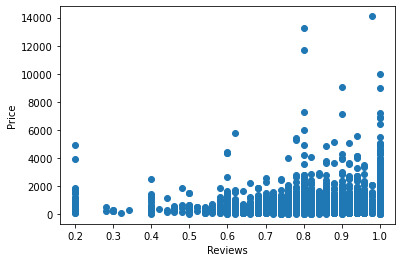

In [316]:
plot_graph(gdf['Reviews'],gdf['Price'],1,"Reviews","Price")

Price and reviews are somewhat linearly related as the rating increased price of book also increased

In [317]:
gdf['Reviews'].max()

1.0

In [107]:
gdf['Reviews'].min()

0.2

In [152]:
gdf['Reviews'].value_counts().max()

1375

In [165]:
adf=gdf.loc[gdf['Reviews']==1]
print("average of all book prices " ,df2['Price'].mean())
print("average Book price with least number of ratings " )
adf['Price'].mean()

average of all book prices  560.7075164341832
average Book price with least number of ratings 


786.5634618181816

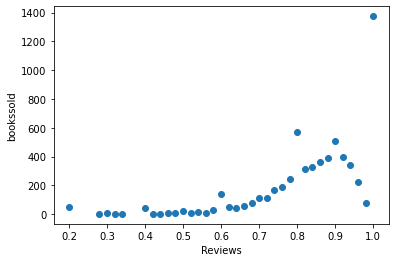

In [225]:
adf=gdf['Reviews'].value_counts()
bookssold=[]
for yearval in adf.keys():
    bookssold.append(adf[yearval])
plot_graph(adf.keys(),bookssold,1,"Reviews","bookssold")

1) Review range is between 0.1 and 1

2) Maximum review is 1 and there are 1375 reviewss with 1 rating

3) Average price of books rated 1 is greater that average book price of all books

4) The data is not so linear that is as the review increases book price does not increase

5) The number of books sold incresed as the reviews of a book increased 

Data analysis on book ratings with price

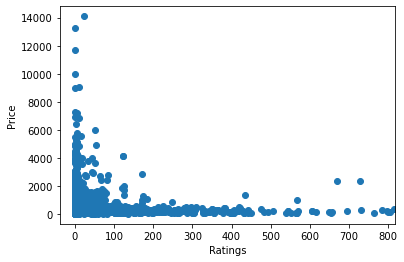

In [153]:
plot_graph(gdf['Ratings'],gdf['Price'],0.8,"Ratings","Price")

In [154]:
gdf['Ratings'].max()

973

In [175]:
adf=df2[['Title','Ratings','publishyear']]
adf=adf.loc[adf['Ratings']==973]
adf.head()

,Title,Ratings,publishyear
2550,The Adventures of Sherlock Holmes and the Memo...,973,2001


In [179]:
gdf['Ratings'].min()

1

In [180]:
adf=df2[['Title','Ratings','publishyear']]
adf=adf.loc[adf['Ratings']==1]
adf.head()

,Title,Ratings,publishyear
4,LIFE 70 Years of Extraordinary Photography,1,2006
9,"The Iron King (The Accursed Kings, Book 1)",1,2013
16,My First Book of London,1,2018
25,Stealth of Nations: The Global Rise of the Inf...,1,2011
38,Prince of Fire,1,2006


In [183]:
adf=gdf[['Ratings','Price']]

In [184]:
adf.loc[adf['Ratings']==973]

,Ratings,Price
2550,973,355.0


In [185]:
gdf['Ratings'].min()

1

Book prices  with minimum number of ratings

In [186]:
adf.loc[adf['Ratings']==1].head()

,Ratings,Price
4,1,965.62
9,1,695.00
16,1,162.00
25,1,621.00
38,1,565.00


In [187]:
adf=adf.loc[adf['Ratings']==1]
print("average of all book prices " ,df2['Price'].mean())
print("average Book price with least number of ratings " )
adf['Price'].mean()

average of all book prices  560.7075164341832
average Book price with least number of ratings 


764.7300379867045

Books with fewer number of rating where sold at a higher price

Data analysis Number of ratings with publish year

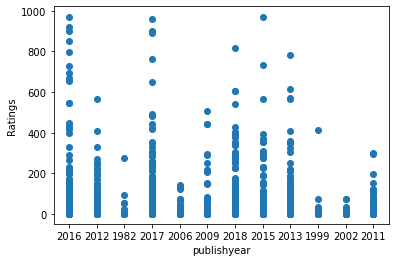

In [193]:
plot_graph(df2['publishyear'],df2['Ratings'],0.2,'publishyear','Ratings')

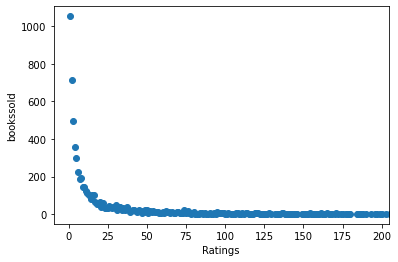

In [228]:
adf=gdf['Ratings'].value_counts()
bookssold=[]
for yearval in adf.keys():
    bookssold.append(adf[yearval])
plot_graph(adf.keys(),bookssold,0.2,"Ratings","bookssold")

1) Maximum number of ratings where for the book The Adventures of Sherlock Holmes and the Memo.. with publish year 2001

2) Min number of ratings for a book  is 1

3) Average book price with least number of ratings is greater that aberage book price

4) Some old books have more number of ratings and even some new books have more number of ratings. So taings and publish year
   are not linearly related

5) Number of ratings are also not linearly related with the book price

6) Number of ratings do not have much impact on the number of book purchases


Data analysis on publishday with price

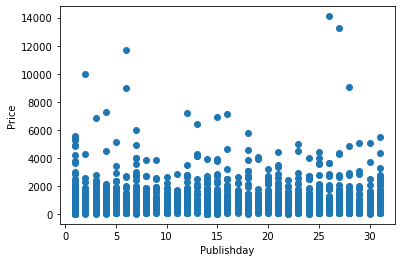

In [230]:
plot_graph(gdf['publishday'],gdf['Price'],1,"Publishday","Price")

Data is uniformly distributed

In [136]:
gdf['publishday'].value_counts()

1.000000     762
13.965774    452
5.000000     307
15.000000    246
7.000000     231
30.000000    229
2.000000     216
28.000000    214
3.000000     210
4.000000     204
10.000000    202
25.000000    200
6.000000     180
20.000000    179
26.000000    172
14.000000    167
18.000000    156
27.000000    155
29.000000    154
24.000000    148
31.000000    133
22.000000    132
12.000000    132
21.000000    130
16.000000    129
8.000000     129
23.000000    127
19.000000    118
13.000000    117
17.000000    110
9.000000     100
11.000000     96
Name: publishday, dtype: int64

In [138]:
adf=gdf[['publishday','Price']]

In [140]:
adf.loc[adf['Price']==df2.Price.max()]

,publishday,Price
2455,26.0,14100.0


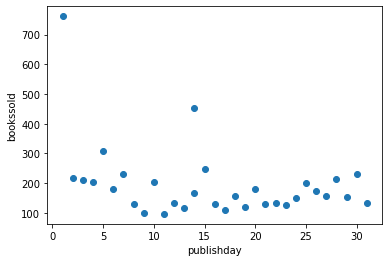

In [232]:
adf=gdf['publishday'].value_counts()
bookssold=[]
for yearval in adf.keys():
    bookssold.append(adf[yearval])
plot_graph(adf.keys(),bookssold,1,"publishday","bookssold")

number of book purchases where more or less similar on all days only a spike on day 1 was observed

Data analysis on publish year with price

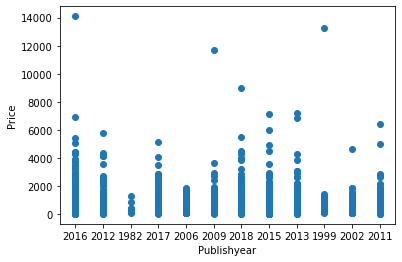

In [233]:
plot_graph(gdf['publishyear'],gdf['Price'],0.2,"Publishyear","Price")

Plotting number of book purchases with publish year

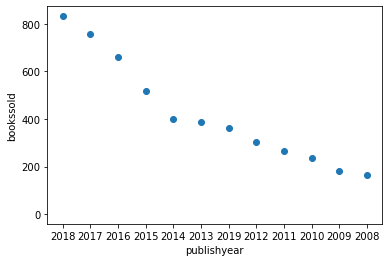

In [234]:
adf=gdf['publishyear'].value_counts()
bookssold=[]
for yearval in adf.keys():
    bookssold.append(adf[yearval])
plot_graph(adf.keys(),bookssold,0.2,"publishyear","bookssold")

The number of books brought have increased ove the years and both the attributes are linearlly related

Data analysi on publish month with price

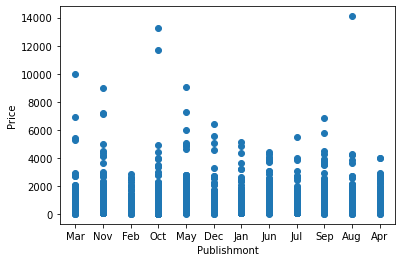

In [235]:
plot_graph(df2['publishmonth'],df2['Price'],1,"Publishmont","Price")

In [241]:
print("Number of books sold each month")
df2['publishmonth'].value_counts()

Number of books sold each month


Oct    1009
Sep     543
May     537
Jan     514
Jun     501
Nov     487
Apr     470
Jul     457
Mar     455
Aug     446
Feb     410
Dec     408
Name: publishmonth, dtype: int64

In [242]:
#Convert book category column labels to alphabets for easy visulaization
BookCategory=df2['BookCategory'].unique()
print(BookCategory)

[Action & Adventure, Biographies, Diaries & True Accounts, Humour, Crime, Thriller & Mystery, Arts, Film & Photography, ..., Language, Linguistics & Writing, Computing, Internet & Digital Media, Romance, Comics & Mangas, Politics]
Length: 11
Categories (11, object): [Action & Adventure, Biographies, Diaries & True Accounts, Humour, Crime, Thriller & Mystery, ..., Computing, Internet & Digital Media, Romance, Comics & Mangas, Politics]


In [243]:
BookCategoryLabels={}
for bookcategoryval in BookCategory:
    BookCategoryLabels[bookcategoryval]=bookcategoryval[:3]
print(BookCategoryLabels)

{'Action & Adventure': 'Act', 'Biographies, Diaries & True Accounts': 'Bio', 'Humour': 'Hum', 'Crime, Thriller & Mystery': 'Cri', 'Arts, Film & Photography': 'Art', 'Sports': 'Spo', 'Language, Linguistics & Writing': 'Lan', 'Computing, Internet & Digital Media': 'Com', 'Romance': 'Rom', 'Comics & Mangas': 'Com', 'Politics': 'Pol'}


In [244]:
BookCategory=[]
for bookval in df2['BookCategory']:
    BookCategory.append(BookCategoryLabels[bookval])

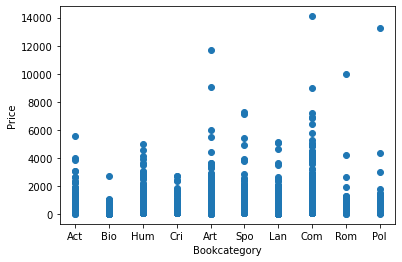

In [245]:
plot_graph(BookCategory,df2['Price'],1,"Bookcategory","Price")

In [247]:
print("Number of book purchases based ob book category")
adf=pd.DataFrame()
adf['BookCategory']=BookCategory
adf=pd.concat([adf,df['Price']])
adf['BookCategory'].value_counts()

Number of book purchases based ob book category


Com    1093
Act     818
Cri     723
Bio     596
Lan     594
Rom     560
Hum     540
Art     517
Spo     471
Pol     325
Name: BookCategory, dtype: int64

In [248]:
df2.corr()

,Reviews,Ratings,Price,publishday
Reviews,1.000000,-0.009644,0.108373,-0.037622
Ratings,-0.009644,1.000000,-0.101145,-0.002107
Price,0.108373,-0.101145,1.000000,0.026587
publishday,-0.037622,-0.002107,0.026587,1.000000


# There are two other important features book cover and Genere
#Genere is highly correlated to Bookcategory so we can ignore it

In [73]:
df2.bookcover.unique()

[Paperback, Hardcover, Hardcover – Import, Paperback – Import, Mass Market Paperback, ..., Hardcover – Unabridged, (French) Paperback, Paperback – EveryBook, (Spanish) Paperback – Import, Paperback – ADPCM]
Length: 57
Categories (57, object): [Paperback, Hardcover, Hardcover – Import, Paperback – Import, ..., (French) Paperback, Paperback – EveryBook, (Spanish) Paperback – Import, Paperback – ADPCM]

In [74]:
df22.columns

Index(['Title', 'Author', 'Reviews', 'Ratings', 'Synopsis', 'Price',
       'publishday', 'publishyear', 'Action & Adventure (Books)',
       'Active Outdoor Pursuits (Books)',
       ...
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object', length=429)

In [75]:
column=[]
for colval in range(54):
    column.append(362+colval)

"""
for colval in range(0,len(column),3):
    columndf=df22.iloc[:,column[colval:colval+3]]
    columndf['Price']=df22['Price']
    print(columndf.corr())
"""

    
    

"\nfor colval in range(0,len(column),3):\n    columndf=df22.iloc[:,column[colval:colval+3]]\n    columndf['Price']=df22['Price']\n    print(columndf.corr())\n"

Finding correlation of Bookcover with price

In [161]:
for colval in range(len(column)):
    columndf=df22.iloc[:,[column[colval]]]
    #print(columndf.corrwith(df22['Price']))
    #print(" ")

# Feature Selection
1) After Carefully analysing all features - Reviews and Rating are the two most important features for a book price

2) Next important feature is the Book category

3) Publish Day also plays a key role as most people tend to buy a book at end of the month or start of the month

4) Book cover is the next important feature. Imported books tend to be more costly

5) Publish month is not so important feature

6) Author name can be ignored due to less number of different authors

7) Other features like synopsyis , Genere are of not much use

8) Though high price books may seem like outliers they are not as all these books have very high ratings and are old books with 
   only one author who has not written any other book in the data set

# Data analysis on author name in much more detail

In [77]:
authorlist=df['Author']
adf=df[['Author','Price']]
print("Number of distinct values ", df['Author'].nunique())

Number of distinct values  3679


In [78]:
adf.head()

,Author,Price
0,Chris Kuzneski,220.00
1,Arun Khopkar,202.93
2,Thomas Hobbes,299.00
3,Agatha Christie,180.00
4,Editors of Life,965.62


In [79]:
adf.max()

Author    sister Jesme
Price            14100
dtype: object

In [80]:
adf.min()

Author    0, Butterfield, Ngondi, Kerr
Price                               25
dtype: object

In [81]:
adf.loc[df['Price']==14100]

,Author,Price
2455,Rene Goscinny,14100.0


In [82]:
adf.loc[df['Author']=='Rene Goscinny']

,Author,Price
2455,Rene Goscinny,14100.0


In [83]:
adf.nlargest(10,'Price')

,Author,Price
2455,Rene Goscinny,14100.00
886,Ronald G. Ehrenberg,13244.67
2607,Design Museum Enterprise Limited,11715.12
2818,Victoria Holt,9984.00
2560,B.N. Goswamy,9096.00
4301,Tite Kubo,8999.00
5704,Scott Gummer,7302.00
4282,Neil Gaiman,7195.00
4463,"G.Gregory Haff, N. Travis Triplett",7132.00
5896,Frank Miller,6911.00


In [84]:
adf.nsmallest(10,'Price')

,Author,Price
418,Maple Press,25.0
5068,RPH Editorial Board,25.0
2079,RPH Editorial Board,28.0
1210,S.T.Imam,30.0
4000,Maple Press,30.0
1082,RPH Editorial Board,31.0
1456,RPH Editorial Board,31.0
3894,Maple Press,36.0
5204,Maple Press,36.0
1492,Anton Chekhov,37.0


In [85]:
adf.loc[adf['Author']=='Maple Press']

,Author,Price
418,Maple Press,25.0
2203,Maple Press,48.0
3894,Maple Press,36.0
4000,Maple Press,30.0
4225,Maple Press,39.0
4455,Maple Press,40.0
4853,Maple Press,39.0
4994,Maple Press,48.0
5204,Maple Press,36.0
5644,Maple Press,360.0


In [86]:
adf.loc[adf['Author']=='RPH Editorial Board']

,Author,Price
1082,RPH Editorial Board,31.0
1456,RPH Editorial Board,31.0
2079,RPH Editorial Board,28.0
4205,RPH Editorial Board,97.0
5009,RPH Editorial Board,170.0
5068,RPH Editorial Board,25.0


 Author name has some effect on price . For example Maple press and RPH editorial books are lot cheaper

Top 10 frequent author's

In [87]:
frequentAuthorList=adf['Author'].value_counts()[:10].index.tolist()

In [88]:
for authors in frequentAuthorList:
    print(adf.loc[df['Author']==authors].head())
    print(" ")
    

              Author  Price
3    Agatha Christie  180.0
6    Agatha Christie  224.0
103  Agatha Christie  319.0
160  Agatha Christie  184.0
229  Agatha Christie  228.0
 
       Author  Price
104  Ladybird   74.0
166  Ladybird   61.0
182  Ladybird   73.0
264  Ladybird  113.0
441  Ladybird  138.0
 
    Author   Price
70      DK  1049.0
315     DK   779.0
401     DK   879.0
717     DK  1049.0
799     DK   560.0
 
            Author  Price
224  Albert Uderzo  678.0
386  Albert Uderzo  342.0
459  Albert Uderzo  355.0
632  Albert Uderzo  399.0
679  Albert Uderzo  324.0
 
    Author   Price
59   Herge  444.25
242  Herge  304.00
408  Herge  799.00
428  Herge  304.00
496  Herge  399.00
 
               Author  Price
150   James Patterson  372.0
663   James Patterson  311.0
1063  James Patterson  244.0
1352  James Patterson  199.0
1538  James Patterson  168.0
 
           Author  Price
144  John Grisham  309.0
213  John Grisham  203.0
232  John Grisham  319.0
444  John Grisham  225.0
457  John G

#Author name does have some significant level ,but using these features will increase the dimmensionality of our data so we ignore thea author name

# Data analysis on  bookcover with price

In [89]:
adf=df2[['bookcover','Price']]
adf.head()

,bookcover,Price
0,Paperback,220.00
1,Paperback,202.93
2,Paperback,299.00
3,Paperback,180.00
4,Hardcover,965.62


In [90]:
adf.max()

bookcover    Tankobon Softcover – Import
Price                              14100
dtype: object

In [91]:
adf.min()

bookcover    (French) Paperback
Price                        25
dtype: object

In [92]:
adf['bookcover'].value_counts()[:5].index.tolist()

['Paperback',
 'Hardcover',
 'Paperback – Import',
 'Mass Market Paperback',
 'Hardcover – Import']

In [93]:
adf.loc[adf['Price']==14100]

,bookcover,Price
2455,Product Bundle,14100.0


In [94]:
adf.loc[adf['bookcover']=='Product Bundle']

,bookcover,Price
2455,Product Bundle,14100.0


In [95]:
adf.loc[adf['Price']==25]

,bookcover,Price
418,Paperback,25.0
5068,Paperback,25.0


In [96]:
adf.nlargest(10,'Price')

,bookcover,Price
2455,Product Bundle,14100.00
886,Hardcover – Import,13244.67
2607,Hardcover,11715.12
2818,Paperback,9984.00
2560,Paperback,9096.00
4301,Paperback – Import,8999.00
5704,Paperback,7302.00
4282,Hardcover,7195.00
4463,Hardcover,7132.00
5896,Hardcover,6911.00


In [97]:
adf.nsmallest(10,'Price')

,bookcover,Price
418,Paperback,25.0
5068,Paperback,25.0
2079,Paperback,28.0
1210,Paperback,30.0
4000,Paperback,30.0
1082,Paperback,31.0
1456,Paperback,31.0
3894,Paperback,36.0
5204,Paperback,36.0
1492,Mass Market Paperback,37.0


#Finding means of all unique bookcovervalues

In [98]:
bookcover=adf['bookcover'].unique()
for bookcoverval in bookcover:
    bookcoverdf=adf.loc[adf['bookcover']==bookcoverval]
    print(bookcoverval,"= ",bookcoverdf['Price'].mean())

Paperback =  475.8426172731253
Hardcover =  960.3772596843613
Hardcover – Import =  1196.7698888888885
Paperback – Import =  619.3926693227093
Mass Market Paperback =  340.5801408450704
Hardcover – Deckle Edge =  1017.43
Paperback – Box set =  2014.75
Sheet music – Import =  737.4
Paperback – International Edition =  327.1
Paperback – Unabridged =  725.1241176470587
Paperback – Special Edition =  445.5385714285714
Paperback – Student Edition =  815.4142857142857
Flexibound – Import =  427.0
Sheet music =  843.3571428571429
Paperback – Illustrated =  653.4371874999999
Paperback – Abridged =  568.5714285714286
Mass Market Paperback – Import =  369.125
Hardcover – Illustrated =  772.0
Plastic Comb – DVD =  1453.0
Paperback – Bargain Price =  259.0
Paperback – Deckle Edge =  318.4
Loose Leaf =  362.0
Mass Market Paperback – Large Print =  369.0
Hardcover – Special Edition =  1019.75
Tankobon Softcover =  693.0
Perfect Paperback =  311.0
Flexibound =  733.7971428571428
Paperback – Audiobook

Bookcover seems to be important in predicting the book price

# Linear Regreesion analysis 

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Known parameters- Bookcover, Rating, review, Bookcategory, publishyear,publishday

Unknown parameter- Book price

In [197]:
dropcolumns=['Title','Author','Synopsis','Genre','publishmonth','Price']
rgdf=df2.drop(dropcolumns,axis='columns')
rgdf=dummy_encoding(rgdf,['BookCategory','bookcover'])

In [198]:
rgdf.head()

,Reviews,Ratings,publishday,publishyear,"Arts, Film & Photography","Biographies, Diaries & True Accounts",Comics & Mangas,"Computing, Internet & Digital Media","Crime, Thriller & Mystery",Humour,...,Paperback – Student Edition,Paperback – Unabridged,Perfect Paperback,Plastic Comb – DVD,Product Bundle,Sheet music,Sheet music – Import,Spiral-bound,Tankobon Softcover,Tankobon Softcover – Import
0,0.80,8,10.0,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.78,14,7.0,2012,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.96,6,25.0,1982,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.82,13,5.0,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.00,1,10.0,2006,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
x_train,x_test,y_train,y_test=train_test_split(rgdf,df2['Price'],test_size=0.2,random_state=49)

In [200]:
reg=LinearRegression().fit(x_train,y_train)

In [201]:
y_pred=reg.predict(x_test)

In [202]:
reg.score(x_test,y_test)

0.13318921385770388

A simple linear regression model is not able to fit in the data as we can say the parameters are not linearly related with the book Price. We need to use nueral networks for training the book price model